In [1]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 븐류
from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# numpy의 구조를 변환
perch_length =np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight =np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

# pandas
df = pd.DataFrame([perch_length,perch_weight])
df = df.T
df


,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


Text(0, 0.5, '무게')

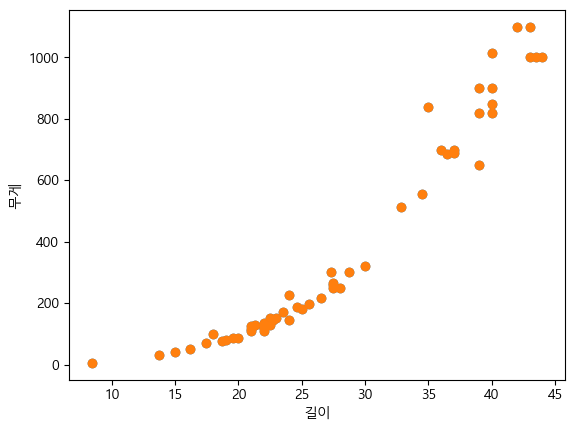

In [3]:
# 산점도로출력 x=길이 y=무게
plt.scatter(df[0],df[1])
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56 non-null     float64
 1   1       56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [5]:
# 머신러닝 구현
# 1. 데이터 전처리 -Nan,0,단위 조정, 훈련세트, 테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
     perch_length,perch_weight
)
test_input

# 3. 데이터 예측하기
# 4. 예측값 구하기

array([13.7, 28. , 18.7, 21. , 26.5, 24. , 27.5, 22.5, 32.8, 25. , 34.5,
       39. , 35. , 39. ])

In [6]:
# 2. 데이터 훈련

In [7]:
arr1 = np.array([1,2,3,4,5,6]) # numpy 행렬로 변환
arr1 = arr1.reshape(-1,1) # 행렬이 모양을 변경
arr1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [8]:
# [1,2,3,4]
# [[1],[2],[3],[4]]

arr1 = np.array([1,2,3,4])
arr1 = arr1.reshape(-1,1)
arr1

array([[1],
       [2],
       [3],
       [4]])

In [9]:
train_input = train_input.reshape(-1,1)
test_input = train_input.reshape(-1,1)


In [10]:
train_input.shape
test_input.shape


(42, 1)

In [11]:
knr = KNeighborsRegressor()

In [12]:
# 데이터 학습시키기

knr.fit(train_input,train_target)

KNeighborsRegressor()

In [13]:
# 예측의 오차범위 - 펑균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게예측
print("예측값 : ",predict)

예측값 :  [ 735.    264.4    84.    735.     68.3  1040.     53.48  218.    735.
  145.    152.    123.    897.    138.    264.4   138.    289.    123.
  897.    897.    122.     77.3   122.     68.3   170.    123.   1040.
   77.3   897.    289.   1040.    264.4  1040.    159.6   123.    123.
   97.     97.    735.    122.    897.   1004.  ]


In [14]:
# 예측한 값과 실제 값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차 범위 : ",test_mean)

ValueError: Found input variables with inconsistent numbers of samples: [14, 42]

In [ ]:
# 예측률 측정하기 - test_input 데이터 검증
score = knr.score(test_input,test_target)
print("예측률 : ",score)

ValueError: Found input variables with inconsistent numbers of samples: [14, 42]

In [ ]:
# knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램 구현

In [ ]:
# 실제 train데이터의 예측률은 어느정도 나오는지 확인
score2 = knr.score(train_input, train_target)
print("train 예측률 : ",score2)

train 예측률 :  0.9854706792485002


그래프 구성


In [ ]:
# 이웃의 개수를 축소 5->3
# 과소적합의 부분 문제를 해결
knr.n_neighbors = 3

knr